In [1]:
from utils import *
from feature_transform import FeatureTransform
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC

In [2]:
train_folder = '../data/train/Inertial_Signals/'
test_folder = '../data/test/Inertial_Signals/'
train_labels = '../data/train/y_train.txt'
test_labels = '../data/test/y_test.txt'

train_signals, test_signals, train_labels, test_labels = load_data(train_folder, test_folder,
                                                                   train_labels, test_labels)

number of train signals, length of each signal, number of components: (7352, 128, 9)
number of test signals, length of each signal, number of components: (2947, 128, 9)


In [ ]:
A = FeatureTransform(train_signals)
X_train, y_train = A.get_feature_matrix(train_signals, train_labels, n_peaks=5)

In [ ]:
B = FeatureTransform(test_signals)
X_test, y_test = B.get_feature_matrix(test_signals, test_labels, n_peaks=5)

In [ ]:
np.save('X_train.npy', X_train)
np.save('X_test.npy', X_test)
np.save('y_train.npy', y_train)
np.load('y_test.npy', y_test)

In [3]:
X_train = np.load('X_train.npy')
X_test = np.load('X_test.npy')
y_train = np.load('y_train.npy')
y_test = np.load('y_test.npy')

In [6]:
svm_params = {'kernel':('linear', 'rbf'), 'C':[0.001, .01, 0.1, 10, 100, 200]} 
rf_params = {
                 'bootstrap': [True, False],
                 'max_depth': [10, 100, None],
                 'max_features': ['auto', 'sqrt'],
                 'min_samples_leaf': [1,  4],
                 'min_samples_split': [2, 10],
                 'n_estimators': [200]
            }
gb_params = {
                'learning_rate': [1, 0.5, 0.25, 0.1, 0.05, 0.01],
                'n_estimators': [200]
            }

models = {
            'SVC': GridSearchCV(SVC(), param_grid=svm_params),
            'RFC': GridSearchCV(RandomForestClassifier(), param_grid=rf_params),
            'Gb': GridSearchCV(GradientBoostingClassifier(), param_grid=gb_params)
        }

SVC Report:
############################################
Train Accuracy: 0.9476332970620239
Test Accuracy : 0.8578215134034611
 
Best parameters:


,C,kernel
0,100,linear


 
Classification Report:


,precision,recall,f1-score,support
1.0,0.877395,0.923387,0.899804,496.000000
2.0,0.856846,0.876858,0.866737,471.000000
3.0,0.866841,0.790476,0.826899,420.000000
4.0,0.816229,0.696538,0.751648,491.000000
5.0,0.770383,0.870301,0.817299,532.000000
6.0,0.962963,0.968343,0.965645,537.000000
accuracy,0.857822,0.857822,0.857822,0.857822
macro avg,0.858443,0.854317,0.854672,2947.000000
weighted avg,0.858690,0.857822,0.856548,2947.000000


 
Confusion Matrix:


,0,1,2,3,4,5
0,458,13,25,0,0,0
1,32,413,26,0,0,0
2,32,56,332,0,0,0
3,0,0,0,342,133,16
4,0,0,0,65,463,4
5,0,0,0,12,5,520


Normalized precision cf


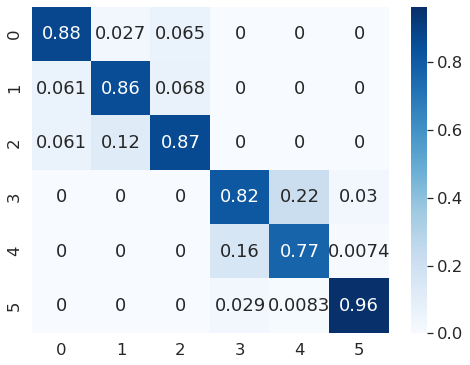

Normalized recall cf


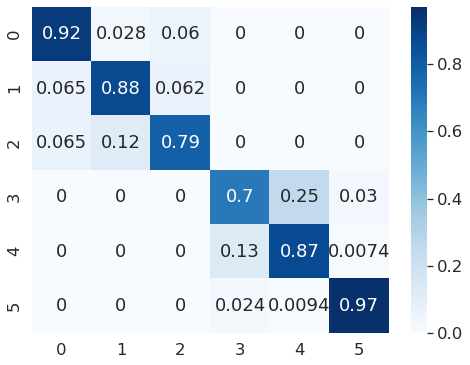

RFC Report:
############################################
Train Accuracy: 1.0
Test Accuracy : 0.9395995928062436
 
Best parameters:


,bootstrap,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators
0,False,None,sqrt,1,2,200


 
Classification Report:


,precision,recall,f1-score,support
1.0,0.954813,0.979839,0.967164,496.0000
2.0,0.927126,0.972399,0.949223,471.0000
3.0,0.955729,0.873810,0.912935,420.0000
4.0,0.941043,0.845214,0.890558,491.0000
5.0,0.870912,0.951128,0.909254,532.0000
6.0,0.998141,1.000000,0.999070,537.0000
accuracy,0.939600,0.939600,0.939600,0.9396
macro avg,0.941294,0.937065,0.938034,2947.0000
weighted avg,0.940974,0.939600,0.939165,2947.0000


 
Confusion Matrix:


,0,1,2,3,4,5
0,486,3,7,0,0,0
1,3,458,10,0,0,0
2,20,33,367,0,0,0
3,0,0,0,415,75,1
4,0,0,0,26,506,0
5,0,0,0,0,0,537


Normalized precision cf


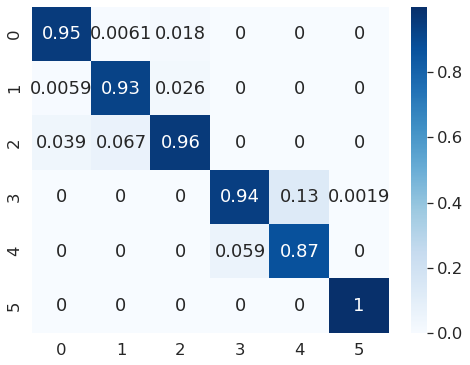

Normalized recall cf


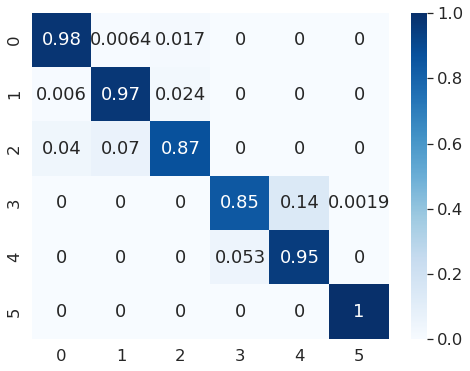

Gb Report:
############################################
Train Accuracy: 1.0
Test Accuracy : 0.9433322022395657
 
Best parameters:


,learning_rate,n_estimators
0,0.25,200


 
Classification Report:


,precision,recall,f1-score,support
1.0,0.963710,0.963710,0.963710,496.000000
2.0,0.943320,0.989384,0.965803,471.000000
3.0,0.947103,0.895238,0.920441,420.000000
4.0,0.949425,0.841141,0.892009,491.000000
5.0,0.867347,0.958647,0.910714,532.000000
6.0,1.000000,1.000000,1.000000,537.000000
accuracy,0.943332,0.943332,0.943332,0.943332
macro avg,0.945151,0.941353,0.942113,2947.000000
weighted avg,0.944921,0.943332,0.942977,2947.000000


 
Confusion Matrix:


,0,1,2,3,4,5
0,478,1,17,0,0,0
1,1,466,4,0,0,0
2,17,27,376,0,0,0
3,0,0,0,413,78,0
4,0,0,0,22,510,0
5,0,0,0,0,0,537


Normalized precision cf


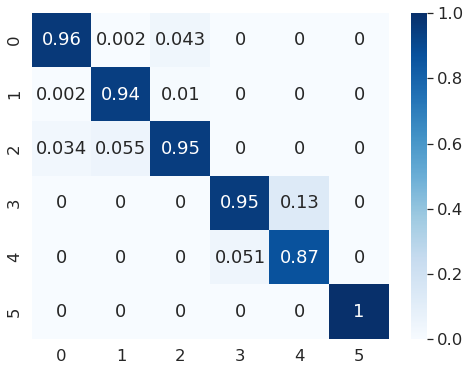

Normalized recall cf


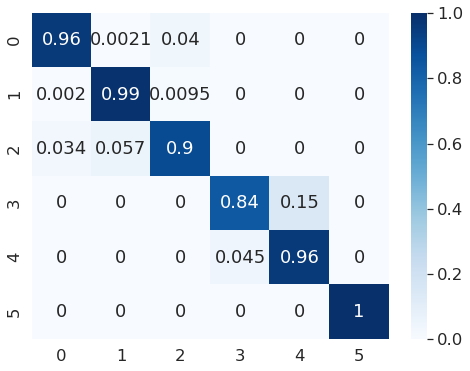

In [7]:
get_classification_results(models, X_train, X_test, y_train, y_test)